In [10]:
import torch
from data_loader import get_loader
import matplotlib.pyplot as plt
from tqdm import tqdm

from torch.utils import data
from torchvision import transforms
from torchvision.datasets import ImageFolder
from PIL import Image
import os
import random
    

In [17]:
IMG_DIR = '/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/rgb_anon_trainvaltest/rgb_anon'
SELECTED_ATTR = ['fog', 'night']
dataloader = get_loader(image_dir=IMG_DIR, selected_attrs=SELECTED_ATTR)
ref_dataloader = get_loader(image_dir=IMG_DIR, selected_attrs=SELECTED_ATTR)
ref2_dataloader = get_loader(image_dir=IMG_DIR, selected_attrs=SELECTED_ATTR)

{'fog': 0, 'night': 1}
{'fog': 0, 'night': 1}
{'fog': 0, 'night': 1}


In [4]:
img, label = next(iter(dataloader))

In [5]:
label

tensor([[0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1]])

In [29]:
label.squeeze(1)

tensor([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [6]:
(x, _), (x_ref, y_) = next(iter(zip(dataloader, ref_dataloader)))

In [9]:
y_.shape

torch.Size([16, 1])

In [11]:
class ACDCDataset(data.Dataset):
    def __init__(self, root_dir, selected_conditions=['daytime', 'fog'], transform=None, mode='train'):
        self.root_dir = root_dir
        self.mode = mode
        
        # Define the weather conditions and corresponding integer labels
        self.selected_conditions = selected_conditions
        self.condition_labels = {condition: i for i, condition in enumerate(selected_conditions)}
        print(self.condition_labels)
       
        self.transform = transform

        self.preprocess()

    def preprocess(self):
        # Collect all the image paths and corresponding integer labels
        self.img_paths = []
        self.labels = []
        for condition in self.selected_conditions:
            condition_path = os.path.join(self.root_dir, condition, self.mode)
            for folder in os.listdir(condition_path):
                if not folder.endswith('_ref'):  # Exclude the '_ref' folders
                    folder_path = os.path.join(condition_path, folder)
                    for img_file in os.listdir(folder_path):
                        if img_file.endswith('.jpg') or img_file.endswith('.png'):  # Assuming images are .jpg or .png
                            self.img_paths.append(os.path.join(folder_path, img_file))
                            self.labels.append(self.condition_labels[condition])

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = Image.open(img_path).convert("RGB")
        image = self.transform(image) if self.transform else image
        label = self.labels[idx]
        return image, torch.tensor([label], dtype=torch.long)
    

def get_loader(image_dir, selected_attrs, image_size=128, batch_size=16, mode='train', num_workers=1):
    """Build and return a data loader."""

    # Create Datalaoders
    train_transform = transforms.Compose([
            transforms.Resize(image_size, transforms.InterpolationMode.BILINEAR),  # Resize the smallest side to 128 and maintain aspect ratio
            transforms.RandomCrop(image_size), 
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(), # [0, 1] -> [-1, 1]
            transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)), 
        ])
    # TODO val_loader

    dataset = ACDCDataset(root_dir=image_dir, selected_conditions=selected_attrs, transform=train_transform, mode=mode)

    data_loader = data.DataLoader(dataset=dataset,
                                  batch_size=batch_size,
                                  shuffle=(mode=='train'),
                                  num_workers=num_workers)
    return data_loader

In [88]:
selected_conditions=['fog', 'night', 'snow', 'rain']
transform=None
mode='train'
root_dir = '/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt'
condition_labels = {condition: i for i, condition in enumerate(selected_conditions)}

img_paths = []
labels = []
for condition in selected_conditions:
    condition_path = os.path.join(root_dir, condition, mode)
    print(condition_path)
    for folder in os.listdir(condition_path):
        folder_path = os.path.join(condition_path, folder)
        print(folder_path)
        for img_file in os.listdir(folder_path):
            if 'labelColor' in img_file and (img_file.endswith('.jpg') or img_file.endswith('.png')):  # Assuming images are .jpg or .png
                img_paths.append(os.path.join(folder_path, img_file))
                labels.append(condition_labels[condition])

/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train
/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0477
/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GP020475
/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0478
/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0479
/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GP010476
/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0476
/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GP010477
/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0475
/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GP010475
/media/talmacsi/48a93eb4-f27d-48ec-9f74

In [89]:
img_paths

['/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0477/GOPR0477_frame_000390_gt_labelColor.png',
 '/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0477/GOPR0477_frame_000229_gt_labelColor.png',
 '/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0477/GOPR0477_frame_000025_gt_labelColor.png',
 '/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0477/GOPR0477_frame_000533_gt_labelColor.png',
 '/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0477/GOPR0477_frame_000607_gt_labelColor.png',
 '/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0477/GOPR0477_frame_000611_gt_labelColor.png',
 '/media/talmacsi/48a93eb4-f27d-48ec-9f74-64e475c3b6ff/Downloads/gt_trainval/gt/fog/train/GOPR0477/GOPR0477_frame_000737_gt_labelColor.png',
 '/media/talm

In [90]:
len(img_paths)

1600

In [91]:
len(dataloader.dataset.img_paths)

800

In [92]:
len(labels)

1600

In [93]:
len(dataloader.dataset.labels)

800

In [94]:
class ACDCDatasetMask(ACDCDataset):

    def preprocess(self):
        # Collect all the imagemask paths and corresponding integer labels
        self.img_paths = []
        self.labels = []
        for condition in self.selected_conditions:
            condition_path = os.path.join(self.root_dir, condition, self.mode)
            for folder in os.listdir(condition_path):
                folder_path = os.path.join(condition_path, folder)
                for img_file in os.listdir(folder_path):
                    if 'labelColor' in img_file and (img_file.endswith('.jpg') or img_file.endswith('.png')):  # Assuming images are .jpg or .png
                        self.img_paths.append(os.path.join(folder_path, img_file))
                        self.labels.append(condition_labels[condition])
    

def get_mask_loader(image_dir, selected_attrs, image_size=128, batch_size=16, mode='train', num_workers=1):
    """Build and return a data loader."""

    # Create Datalaoders
    train_transform = transforms.Compose([
            transforms.Resize(image_size, transforms.InterpolationMode.NEAREST),  # Resize the smallest side to 128 and maintain aspect ratio
            transforms.RandomCrop(image_size),
            transforms.ToTensor()
        ])

    dataset = ACDCDatasetMask(root_dir=image_dir, selected_conditions=selected_attrs, transform=train_transform, mode=mode)

    data_loader = data.DataLoader(dataset=dataset,
                                  batch_size=batch_size,
                                  shuffle=(mode=='train'),
                                  num_workers=num_workers)
    return data_loader

In [95]:
mask_dataloader = get_mask_loader(root_dir, selected_conditions)

{'fog': 0, 'night': 1, 'snow': 2, 'rain': 3}


In [100]:
def tensor_to_img(tensor):
    numpy_img = tensor.numpy()
    return numpy_img.transpose((1, 2, 0))  # Convert from CxHxW to HxWxC

def plot_images(images, labels):
    batch_labels = [selected_conditions[l] for l in labels.squeeze(1)]
    # batch_labels = labels.squeeze(1)
    fig, ax = plt.subplots(1, 16, figsize=(15,5))
    for i in range(int(16)):
        ax[i].imshow(tensor_to_img(images[i]))
        ax[i].set_title(batch_labels[i]) 
        ax[i].axis('off')

    plt.show()


In [97]:
mask_img, mask_label = next(iter(mask_dataloader))

In [98]:
mask_img.shape

torch.Size([16, 3, 128, 128])

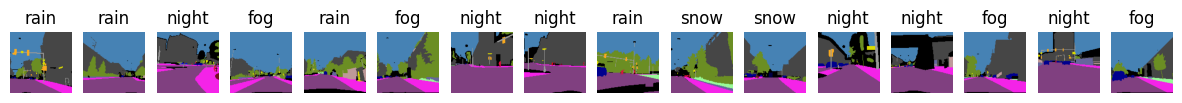

In [101]:
plot_images(mask_img, mask_label)